In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ["status", "duration", "credit_history", "purpose", "amount", "savings", "employment_duration", "installment_rate", "personal_status_sex",
             "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", "telephone", "foreign_worker", "credit_risk"]
df = pd.read_table("SouthGermanCredit.asc", delimiter = " ", names = col_names, header = 0)

In [3]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.iloc[:,:20]
y = df.iloc[:,20:]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
import statsmodels.api as sm

In [8]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.478361
         Iterations 6


In [9]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:            credit_risk   No. Observations:                  700
Model:                          Logit   Df Residuals:                      680
Method:                           MLE   Df Model:                           19
Date:                Mon, 17 Oct 2022   Pseudo R-squ.:                  0.2138
Time:                        19:17:54   Log-Likelihood:                -334.85
converged:                       True   LL-Null:                       -425.90
Covariance Type:            nonrobust   LLR p-value:                 1.200e-28
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
status                      0.5566      0.084      6.640      0.000       0.392       0.721
duration                   -0.0283      0.010     -2.749      0.006      -0.049      -0.008


Features Selected Using Combination of Statistical Significance and Impact. (All significant coefs at 0.1 alpha level were selected)

In [10]:
X_train_reduced = X_train[["status", "duration", "credit_history", "amount", "savings", "installment_rate", "foreign_worker", "personal_status_sex", "telephone"]]
X_test_reduced = X_test[["status", "duration", "credit_history", "amount", "savings", "installment_rate", "foreign_worker", "personal_status_sex", "telephone"]]

In [11]:
log_reg_reduced = sm.Logit(y_train, X_train_reduced).fit()

Optimization terminated successfully.
         Current function value: 0.486058
         Iterations 6


In [12]:
print(log_reg_reduced.summary())

                           Logit Regression Results                           
Dep. Variable:            credit_risk   No. Observations:                  700
Model:                          Logit   Df Residuals:                      691
Method:                           MLE   Df Model:                            8
Date:                Mon, 17 Oct 2022   Pseudo R-squ.:                  0.2011
Time:                        19:17:55   Log-Likelihood:                -340.24
converged:                       True   LL-Null:                       -425.90
Covariance Type:            nonrobust   LLR p-value:                 6.846e-33
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
status                  0.5662      0.082      6.922      0.000       0.406       0.726
duration               -0.0280      0.010     -2.793      0.005      -0.048      -0.008
credit_history  

In [13]:
y1 = log_reg.predict(X_train)
y2 = log_reg.predict(X_test)
y3 = log_reg_reduced.predict(X_train_reduced)
y4 = log_reg_reduced.predict(X_test_reduced)

In [14]:
from sklearn import metrics

In [15]:
fpr1, tpr1, _ = metrics.roc_curve(y_train,  y1)
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y2)
fpr3, tpr3, _ = metrics.roc_curve(y_train,  y3)
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y4)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
auc3 = metrics.auc(fpr3, tpr3)
auc4 = metrics.auc(fpr4, tpr4)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
for t in np.linspace(0,1,101):
    y_pred1 = np.where(y1>t, 1, 0)
    if accuracy_score(y_train, y_pred1) > a1:
        a1 = accuracy_score(y_train, y_pred1)
for t in np.linspace(0,1,101):
    y_pred2 = np.where(y2>t, 1, 0)
    if accuracy_score(y_test, y_pred2) > a2:
        a2 = accuracy_score(y_test, y_pred2)
for t in np.linspace(0,1,101):
    y_pred3 = np.where(y3>t, 1, 0)
    if accuracy_score(y_train, y_pred3) > a3:
        a3 = accuracy_score(y_train, y_pred3)
for t in np.linspace(0,1,101):
    y_pred4 = np.where(y4>t, 1, 0)
    if accuracy_score(y_test, y_pred4) > a4:
        a4 = accuracy_score(y_test, y_pred4) 

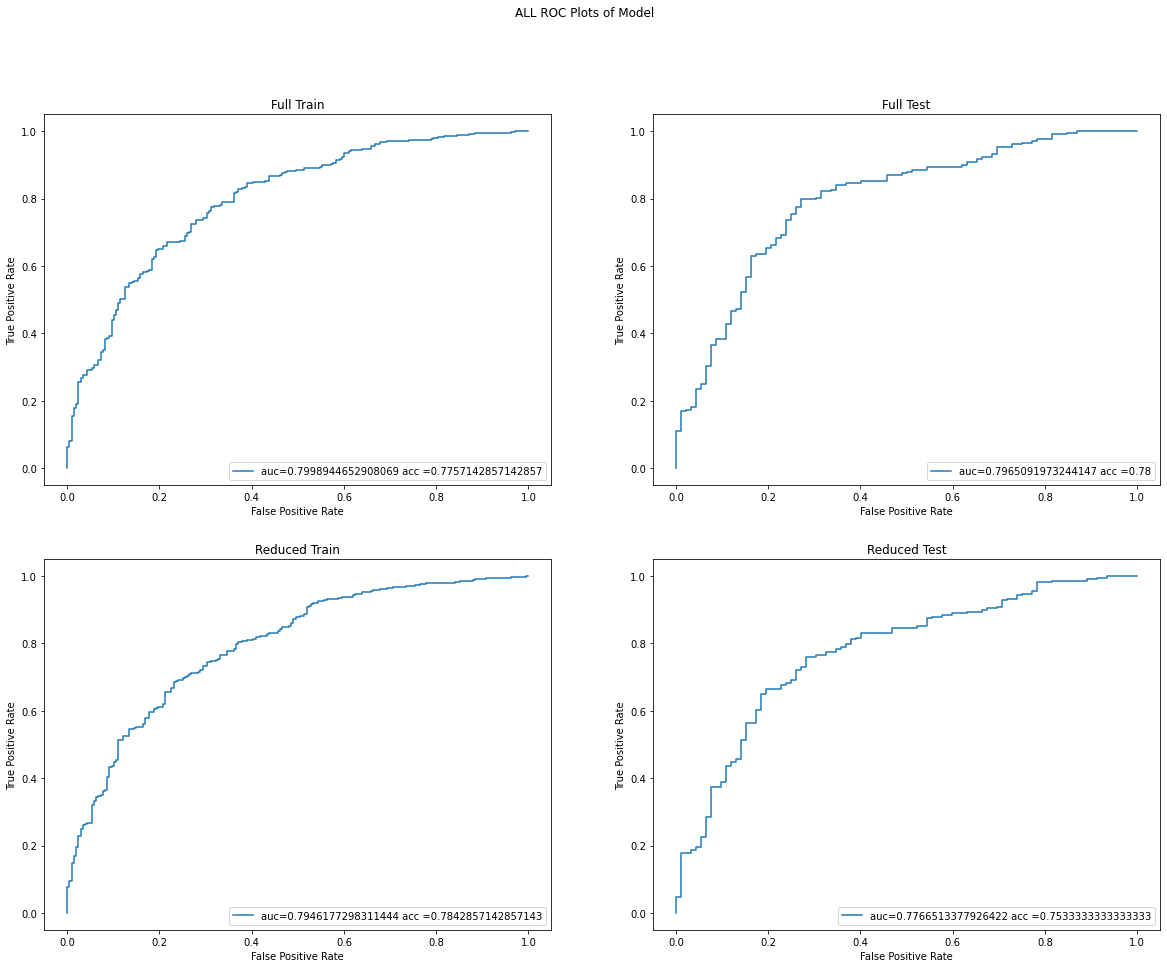

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('ALL ROC Plots of Model')
axs[0,0].plot(fpr1,tpr1,label="auc="+str(auc1)+" acc ="+str(a1))
axs[0,0].set_title('Full Train')

axs[0,1].plot(fpr2,tpr2,label="auc="+str(auc2)+" acc ="+str(a2))
axs[0,1].set_title('Full Test')

axs[1,0].plot(fpr3,tpr3,label="auc="+str(auc3)+" acc ="+str(a3))
axs[1,0].set_title('Reduced Train')

axs[1,1].plot(fpr4,tpr4,label="auc="+str(auc4)+" acc ="+str(a4))
axs[1,1].set_title('Reduced Test')

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.legend(loc=4)
plt.show()

The model perfroms okay on predicting the credit risk. Both models has an optimal accuracy slightly below 80% on the train dataset and seems to not overfit as ROC Curves between the train and test sets are very similar. The Full Model Performs the best and doesn't overfit so it isn't too complex/redundant.

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [20]:
clfL=LDA()
clfL.fit(X_train,y_train.values.ravel())


LinearDiscriminantAnalysis()

In [21]:
y_1 = clfL.predict(X_train)
y_2 = clfL.predict(X_test)

In [22]:
fpr_1, tpr_1, _ = metrics.roc_curve(y_train,  y_1)
fpr_2, tpr_2, _ = metrics.roc_curve(y_test,  y_2)
a_1 = accuracy_score(y_train, y_1)
a_2 = accuracy_score(y_test, y_2)
auc_1 = metrics.auc(fpr_1, tpr_1)
auc_2 = metrics.auc(fpr_2, tpr_2)

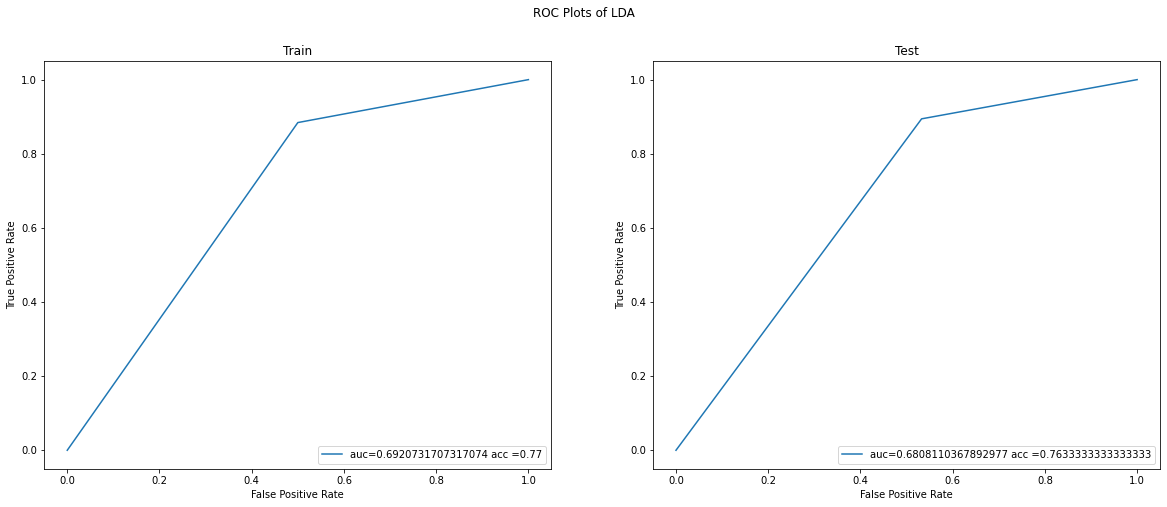

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7.5))
fig.suptitle('ROC Plots of LDA')
axs[0].plot(fpr_1,tpr_1,label="auc="+str(auc_1)+" acc ="+str(a_1))
axs[0].set_title('Train')

axs[1].plot(fpr_2,tpr_2,label="auc="+str(auc_2)+" acc ="+str(a_2))
axs[1].set_title('Test')

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.legend(loc=4)
plt.show()

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [25]:
clfQ=QDA()
clfQ.fit(X_train,y_train.values.ravel())

QuadraticDiscriminantAnalysis()

In [26]:
y_3 = clfQ.predict(X_train)
y_4 = clfQ.predict(X_test)

In [27]:
fpr_3, tpr_3, _ = metrics.roc_curve(y_train,  y_3)
fpr_4, tpr_4, _ = metrics.roc_curve(y_test,  y_4)
a_3 = accuracy_score(y_train, y_3)
a_4 = accuracy_score(y_test, y_4)
auc_3 = metrics.auc(fpr_3, tpr_3)
auc_4 = metrics.auc(fpr_4, tpr_4)

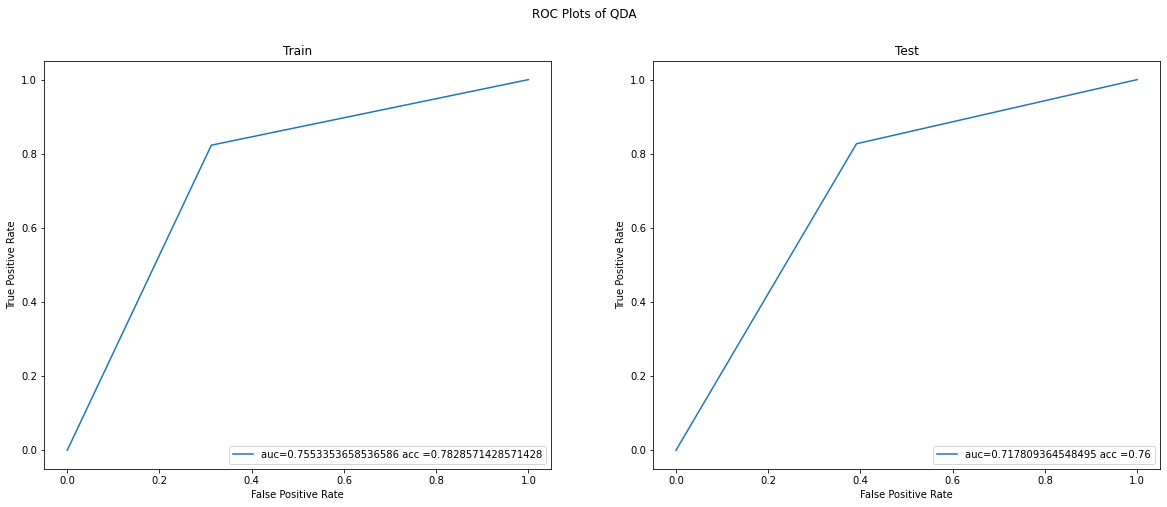

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7.5))
fig.suptitle('ROC Plots of QDA')
axs[0].plot(fpr_3,tpr_3,label="auc="+str(auc_3)+" acc ="+str(a_3))
axs[0].set_title('Train')

axs[1].plot(fpr_4,tpr_4,label="auc="+str(auc_4)+" acc ="+str(a_4))
axs[1].set_title('Test')

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'Receiver Operating Characteristic')

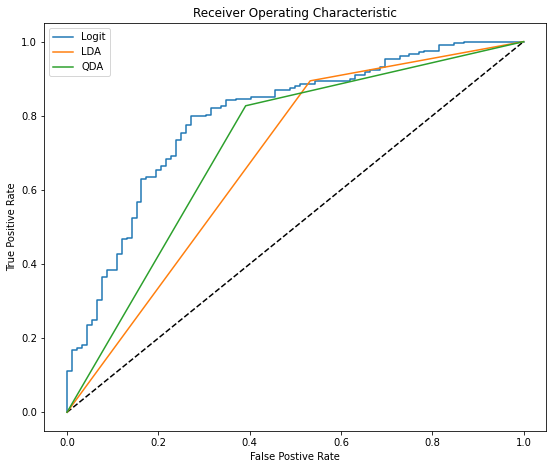

In [43]:
plt.figure(figsize=(9, 7.5))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr2, tpr2, label= "Logit")
plt.plot(fpr_2, tpr_2, label= "LDA")
plt.plot(fpr_4, tpr_4, label= "QDA")
plt.legend()
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')

Comparing the ROC curves of the 3 Models, it is clear that the Logistic Regression model is the most superior as it has a higher gain (Better in the highest Deciles). For LDA has TPR of <.4 for a FPR of .2 and QDA has a TPR <.5 at the same FPR. Logistic Regression has the Highest TPR at the .2 FPR level.